# Connect to Dremio with R (use this as a template)

In [27]:
################################################
#              Connect to Dremio               #
################################################
# Don't edit this
if (!require(odbc)) { install.packages("odbc"); require("odbc") }
if (!require(getPass)) { install.packages("getPass"); require("getPass") }
require(DBI)

dremio_host <- 'dremio-client.dremio.svc.cluster.local'
dremio_port <- 31010
dremio_driver <- Sys.getenv('DREMIO_DRIVER')

cnxn <- DBI::dbConnect(
    odbc::odbc(), 
    driver = "Dremio ODBC Driver 64-bit",
    uid = getPass::getPass(prompt = "Dremio Username: "), 
    pwd = getPass::getPass(prompt = "Dremio Password: "), 
    host = dremio_host, 
    port = dremio_port,
    AuthenticationType = "Basic Authentication", 
    ConnectionType = "Direct"
)

print("Connected.")

Dremio Username:  ··················
Dremio Password:  ················


[1] "Connected."


## An overview of what's available

In [28]:
print("Catalogs:")
sql = "SELECT * FROM INFORMATION_SCHEMA.CATALOGS LIMIT 5"
request <- dbSendQuery(cnxn, sql)
df <- dbFetch(request, n = 100)
df

[1] "Catalogs:"


CATALOG_NAME,CATALOG_DESCRIPTION,CATALOG_CONNECT
<chr>,<chr>,<chr>
DREMIO,The internal metadata used by Dremio,


In [29]:
print("Tables")
dbListTables(con)

[1] "Tables"


[1] "CATALOGS"              "COLUMNS"               "SCHEMATA"             
 [4] "TABLES"                "VIEWS"                 "boot"                 
 [7] "dependencies"          "fragments"             "materializations"     
[10] "memory"                "nodes"                 "options"              
[13] "reflections"           "refreshes"             "services"             
[16] "slicing_threads"       "threads"               "version"              
[19] "datasets"              "mount_points"          "objects"              
[22] "storage_plugins"       "bank"                  "melb_data"            
[25] "Dremio University"     "12100121.csv"          "12100121_MetaData.csv"
[28] "13100766.csv"          "13100766_MetaData.csv" "14100287.csv"         
[31] "14100287_MetaData.csv" "14100289.csv"          "14100289_MetaData.csv"
[34] "16100047.csv"          "16100047_MetaData.csv" "18100004.csv"         
[37] "18100004_MetaData.csv" "20100008.csv"          "20100008_MetaData.csv"
[40] "23100008.csv"          "23100008_MetaData.csv" "24100005.csv"         
[43] "24100005_MetaData.csv" "36100434.csv"          "36100434_MetaData.csv"
[46] "test12"

In [30]:
print("Columns:")
sql = "SELECT * FROM INFORMATION_SCHEMA.COLUMNS LIMIT 5"
request <- dbSendQuery(cnxn, sql)
df <- dbFetch(request, n = 100)
df

[1] "Columns:"


Warning message in new_result(connection@ptr, statement, immediate):
“Cancelling previous query”


TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,COLUMN_NAME,ORDINAL_POSITION,COLUMN_DEFAULT,IS_NULLABLE,DATA_TYPE,COLUMN_SIZE,CHARACTER_MAXIMUM_LENGTH,CHARACTER_OCTET_LENGTH,NUMERIC_PRECISION,NUMERIC_PRECISION_RADIX,NUMERIC_SCALE,DATETIME_PRECISION,INTERVAL_TYPE,INTERVAL_PRECISION
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
DREMIO,@christian.ritter,bank,A,1,NA,YES,CHARACTER VARYING,65536,65536,262144,NA,NA,NA,NA,NA,NA
DREMIO,@christian.ritter,bank,B,2,NA,YES,CHARACTER VARYING,65536,65536,262144,NA,NA,NA,NA,NA,NA
DREMIO,@christian.ritter,bank,C,3,NA,YES,CHARACTER VARYING,65536,65536,262144,NA,NA,NA,NA,NA,NA
DREMIO,@christian.ritter,bank,D,4,NA,YES,CHARACTER VARYING,65536,65536,262144,NA,NA,NA,NA,NA,NA
DREMIO,@christian.ritter,bank,E,5,NA,YES,CHARACTER VARYING,65536,65536,262144,NA,NA,NA,NA,NA,NA


In [31]:
dbListFields(cnxn, "dremiosharedstorage.shared.\"12100121.csv\"")

character(0)

In [ ]:
# If you want to close the connection
# close(channel)

In [ ]:
# For more commands, see the SQL Reference
# https://docs.dremio.com/sql-reference/

################################################
#           End of Connect to Dremio           #
################################################

# Get started with your analysis!

In [ ]:
sql = "SELECT * FROM dremiosharedstorage.shared.\"12100121.csv\""
request <- dbSendQuery(cnxn, sql)
df <- dbFetch(request)
df

In [34]:
# The upstream data that I'm using didn't label the columns, so I have to.
colnames(df) <- df[1,]
df <- df[-1, ] 

In [42]:
names(df)

[1] "REF_DATE"                                            
 [2] "GEO"                                                 
 [3] "DGUID"                                               
 [4] "Trade"                                               
 [5] "Basis"                                               
 [6] "Seasonal adjustment"                                 
 [7] "North American Product Classification System (NAPCS)"
 [8] "UOM"                                                 
 [9] "UOM_ID"                                              
[10] "SCALAR_FACTOR"                                       
[11] "SCALAR_ID"                                           
[12] "VECTOR"                                              
[13] "COORDINATE"                                          
[14] "VALUE"                                               
[15] "STATUS"                                              
[16] "SYMBOL"                                              
[17] "TERMINATED"                                          
[18] "DECIMALS"

In [43]:
library(dplyr)

In [47]:
values = df %>% select(VALUE)
# string to number
values <- as.data.frame(lapply(values, as.numeric))

In [49]:
mean(values$VALUE)

[1] 806.5897

In [51]:
sd(values$VALUE)

[1] 2823.458

In [74]:
v = values$VALUE
#hist(c(values$VALUE), "Values", breaks = 20)
hist(v, main="legend", breaks = 100)

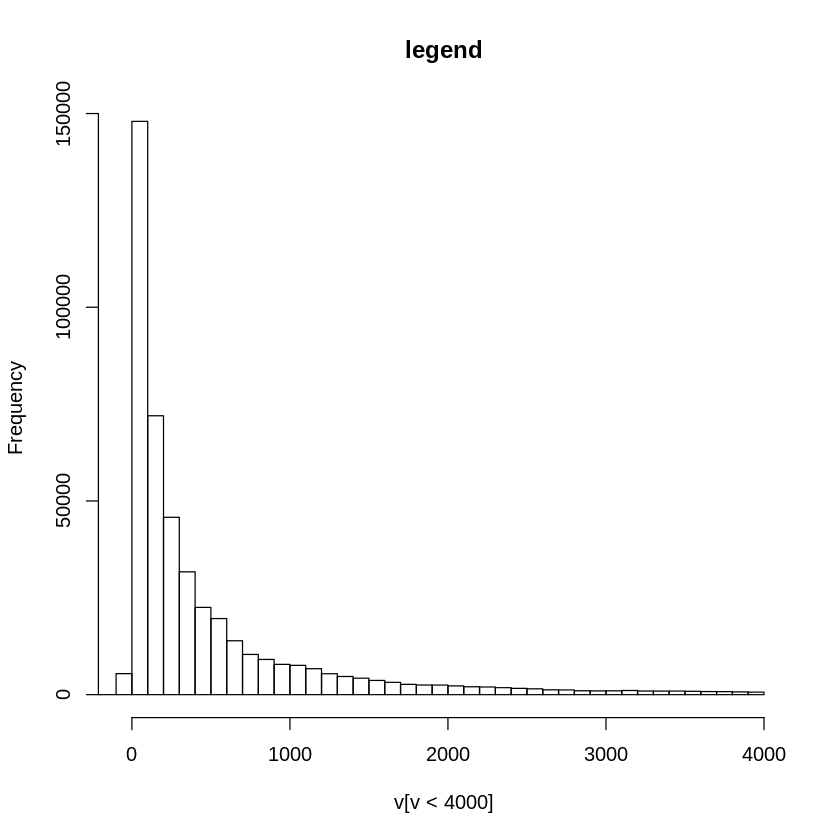

In [85]:
# Exclude outliers

hist(v[v < 4000], main="legend", xlim=c(-50, 4000), breaks = 60)